In [1]:
from bs4 import BeautifulSoup
import urllib2
import codecs

In [ ]:
nltk.download()

In [2]:
resp = urllib2.urlopen("http://lyricstranslate.com/en/national-anthems-lyrics.html")
soup = BeautifulSoup(resp, from_encoding=resp.info().getparam('charset'))

anthemLinks = []
for link in soup.find_all('a', href=True):
    if ((link.string == 'English') or (link.string == '#1')) and (link['href'][-4:] == 'html'):
        anthemLinks.append(link['href'])

C:\Users\Panni\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\Panni\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
anthemLinks = anthemLinks[1:]

In [32]:
urlBase = 'http://lyricstranslate.com'
error = []
for i in range(0,len(anthemLinks)):
    urlEnd = anthemLinks[i]

    resp = urllib2.urlopen(urlBase + urlEnd)
    soup = BeautifulSoup(resp, from_encoding=resp.info().getparam('charset'))

    anthem = ''
    for row in soup.find_all('div'):
        if ('English translation' in row.text) and ('Submitted by' in row.text):
            ind = row.text.index('English translation')
            end = row.text.index('Submitted by')
            anthem = row.text[ind:end]
    
    try:
        anthem = anthem.replace('\n', '', 1)
        anthem = anthem[anthem.index('\n')+1:]
    except:
        error.append(i)
    urlEnd = urlEnd[4:-5].replace('%','')
    if i not in error:
        with codecs.open(urlEnd + '.txt', "w", "utf-8-sig") as temp:
            temp.write(anthem)

    print str(i+1) + '/' + str(len(anthemLinks)) + ' finished.'

1/308 finished.
2/308 finished.
3/308 finished.
4/308 finished.
5/308 finished.
6/308 finished.
7/308 finished.
8/308 finished.
9/308 finished.
10/308 finished.
11/308 finished.
12/308 finished.
13/308 finished.
14/308 finished.
15/308 finished.
16/308 finished.
17/308 finished.
18/308 finished.
19/308 finished.
20/308 finished.
21/308 finished.
22/308 finished.
23/308 finished.
24/308 finished.
25/308 finished.
26/308 finished.
27/308 finished.
28/308 finished.
29/308 finished.
30/308 finished.
31/308 finished.
32/308 finished.
33/308 finished.
34/308 finished.
35/308 finished.
36/308 finished.
37/308 finished.
38/308 finished.
39/308 finished.
40/308 finished.
41/308 finished.
42/308 finished.
43/308 finished.
44/308 finished.
45/308 finished.
46/308 finished.
47/308 finished.
48/308 finished.
49/308 finished.
50/308 finished.
51/308 finished.
52/308 finished.
53/308 finished.
54/308 finished.
55/308 finished.
56/308 finished.
57/308 finished.
58/308 finished.
59/308 finished.
60/308

In [48]:
i = 10
print error[i]
print anthemLinks[error[i]]
# Ok, these all seem to be in other languages (arabic, greek, etc.), included because of my overkill when checking every link with "#1"

71
/en/chinese-national-anthem-roc-taiwan-%E4%B8%AD%E8%8F%AF%E6%B0%91%E5%9C%8B%E5%9C%8B%E6%AD%8C-%EC%A4%91%ED%99%94%EB%AF%BC%EA%B5%AD%EC%9D%98-%EA%B5%AD%EA%B0%80-%EB%8C%80%EB%A7%8C.html


## Distilling words of the anthem

In [1]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from nltk.corpus import stopwords
myStopWords = stopwords.words("english")
exceptions = ['our','ours','ourselves','was','were','be','been','being','will','wasn',"wasn't",'weren',"weren't",'won',"won't"]
for el in exceptions:
    myStopWords.remove(el)

myStopWords = [u'have', u'has', u'had', u'having',u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours',u'it', u"it's", u'its', u'itself',u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those',u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as',u'of', u'at', u'by', u'for',u'into',u'to', u'from',u'in', u'out', u'on', u'off',u'so', u'than', u'too', u'very', u's', u't']
myStopWords = stopwords.words("english") + ['thy','thee','thou','maryland','chorus']

In [3]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = myStopWords, max_features = 5000,encoding='latin-1')  

In [4]:
def PreProcess(anthem):
    lower_anthem = anthem.lower()
    letters_only = re.sub("[^a-zA-Z]", " ", lower_anthem)
    
    return letters_only


def SplitToWords(letters_only):
    wordList = letters_only.split()
    
    return wordList


def WordCount(wordList):
    train_data_features = vectorizer.fit_transform(wordList)
    train_data_features = train_data_features.toarray()
    vocab = vectorizer.get_feature_names()
    
    # Sum up the counts of each vocabulary word
    dist = np.sum(train_data_features, axis=0)

    # For each, print the vocabulary word and the number of times it 
    # appears in the training set
    anthemList = []
    for tag, count in zip(vocab, dist):
        anthemList.append((tag,count))
        
    return anthemList

In [5]:
def CreateAnthemList(listOfFiles):
    fullAnthems = []
    for fileName in listOfFiles:
        with open(fileName, 'r') as f:
            anthem = f.read()
        
        fullAnthems.append(anthem)
            
    return fullAnthems

In [6]:
import glob

def ListAllFiles(folder):
    allfiles = []
    filenames = glob.glob(folder + '/*.txt')
    for filename in filenames:
        temp = filename.split("\\")
        temp = temp[-2] + '/' + temp[-1]
        allfiles.append(temp)
    
    return allfiles

In [7]:
def CreateBagofWords(listOfFiles):
    fullAnthems = CreateAnthemList(listOfFiles)
    
    fullWordList = []
    for anthem in fullAnthems:
        fullWordList = fullWordList + SplitToWords(PreProcess(anthem))
    wordcount = WordCount(fullWordList)
    
    return wordcount, fullWordList

In [8]:
tFiles = ListAllFiles('translation')
oFiles = ListAllFiles('english')

twordcount, twordList = CreateBagofWords(tFiles)
owordcount, owordList = CreateBagofWords(oFiles)
fwordcount, fwordList = CreateBagofWords(tFiles+oFiles)

## Stemming

In [12]:
from collections import Counter

filtered = [w for w in fwordList if not w in myStopWords]
count = Counter(filtered)
print count.most_common(50)

[('land', 325), ('us', 302), ('let', 269), ('people', 208), ('may', 189), ('god', 187), ('glory', 178), ('country', 150), ('homeland', 147), ('love', 140), ('free', 136), ('one', 132), ('freedom', 131), ('oh', 130), ('live', 123), ('great', 122), ('shall', 113), ('peace', 112), ('nation', 104), ('flag', 103), ('world', 102), ('long', 98), ('blood', 97), ('heart', 90), ('fatherland', 88), ('sun', 86), ('like', 85), ('sea', 79), ('ever', 73), ('life', 67), ('always', 66), ('king', 66), ('march', 64), ('come', 62), ('sky', 62), ('forever', 61), ('time', 61), ('liberty', 60), ('beloved', 59), ('dear', 59), ('sons', 59), ('hail', 57), ('every', 57), ('happiness', 57), ('never', 56), ('united', 56), ('light', 55), ('unity', 55), ('beautiful', 54), ('stand', 54)]


In [13]:
from nltk.stem.porter import *

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = [stemmer.stem(word.decode('utf-8')) for word in filtered]
fwordcount_stemmed = WordCount(stemmed)

## Visualizing most frequent words

In [14]:
#from wordcloud import WordCloud
#
#wc = WordCloud().generate_from_frequencies(fwordcount)
#plt.imshow(wc)
#plt.axis("off")
#plt.show()

In [15]:
def BarPlots(wordcount):
    firstFewWords = 20
    keys = []
    freq = []
    sortedWords = sorted(((v, k) for k, v in wordcount), reverse=True)
    for el in sortedWords:
        keys.append(el[1])
        freq.append(el[0])

    keysPlot = keys[0:firstFewWords]
    freqPlot = freq[0:firstFewWords]
    indexes = np.arange(len(keysPlot))
    plt.bar(indexes, freqPlot)
    # add labels
    plt.xticks(indexes, keysPlot,rotation=90)
    plt.show()
    
    keysPlot = keys[firstFewWords:firstFewWords*2]
    freqPlot = freq[firstFewWords:firstFewWords*2]
    indexes = np.arange(len(keysPlot))
    plt.bar(indexes, freqPlot)
    # add labels
    plt.xticks(indexes, keysPlot,rotation=90)
    plt.show()
    
    return keys,freq

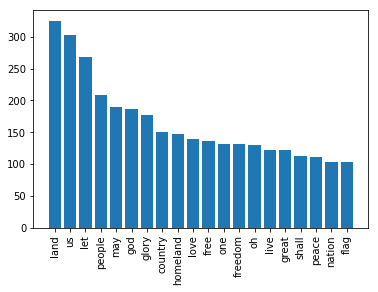

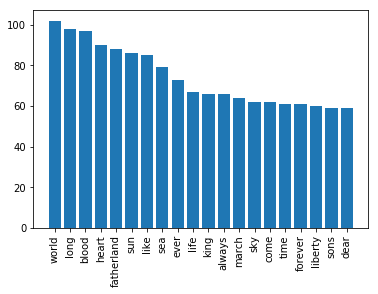

In [16]:
keys,freq = BarPlots(fwordcount)

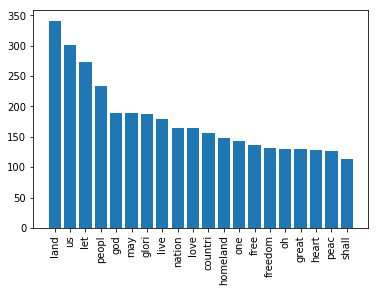

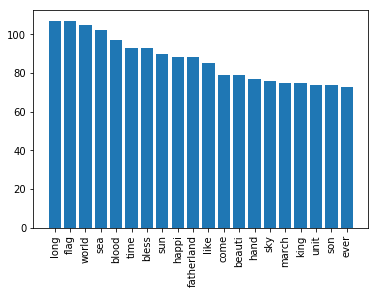

In [17]:
keys,freq = BarPlots(fwordcount_stemmed)

'Maryland' was previously overrepresented. I have already added some extra terms as stopwords, then added this one too.

I'd like to see if there's a sharp decline eventually: for words that are not at all common, on the contrary: they are poem-specific.

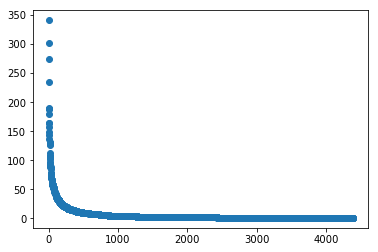

In [18]:
keysPlot = keys[0:]
freqPlot = freq[0:]
indexes = np.arange(len(keysPlot))
plt.scatter(indexes, freqPlot)
plt.show()

This is really interesting! There's a very clear drop in the total frequency of words, we should be able to fit either a linear to the first couple of data points, or an exponential (?) to the whole data; to determine this cutoff value.

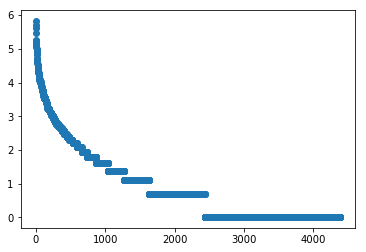

In [19]:
keysPlot = keys[0:]
freqPlot = freq[0:]
indexes = np.arange(len(keysPlot))
plt.scatter(indexes, np.log(freqPlot))
plt.show()

It's not quite an exponential, though. Also, a late sharp drop is missing, rather it slowly converges to 0 (due to the abundance of unique words!)


Let's use the first 5 data points to fit a linear.

In [20]:
noPoints = 5
linear = np.polyfit(np.arange(noPoints), freq[0:noPoints], 1)
print linear

[ -37.   342.2]


In [21]:
x = -linear[1]/linear[0]
print x

9.24864864865


I'm not quite satisfied with this, simply because when I change the number of points to fit the linear on, the resulting predicted cutoff changes too drastically.

Let's experiment with an exponential.

In [22]:
x = np.arange(len(keys[0:]))
y = freq[0:]
exponential = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-t/b),  x,  y)
print exponential

(array([ 171.50558641,   71.22045303]), array([[ 2.35462815, -0.97784132],
       [-0.97784132,  0.82372961]]))


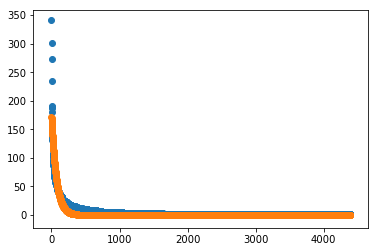

In [23]:
keysPlot = keys[0:]
freqPlot = freq[0:]
indexes = np.arange(len(keysPlot))
plt.scatter(indexes, freqPlot)
plt.scatter(indexes, exponential[0][0]*np.exp(-indexes/exponential[0][1]))
plt.show()

Well, the fit isn't ideal, but it'll work for the purpose of where to cut off features: we should keep ~70 features.

## Generating feature vectors for all the anthems

I want to see whether there is a clear clustering of all the anthems into 2 groups: reflective and cheerful, active and passive, positive and negative ones. I'll use an SVM to try to separate the data, and we'll see how good the separation is.

(I'll probably also try sentiment-analysis on the words of each anthem, and then assign a score to them based on that)

In [24]:
corpus = ''
for el in keys[0:70]:
    corpus = corpus + el + ' '

In [25]:
corpus

u'land us let peopl god may glori live nation love countri homeland one free freedom oh great heart peac shall long flag world sea blood time bless sun happi fatherland like come beauti hand sky march king unit son ever mountain stand life sing light die alway rise victori give forev liberti fight work dear belov voic etern name hail everi arm never go day brave war uniti song shine '

In [26]:
X = vectorizer.fit_transform([corpus])

In [27]:
X.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]], dtype=int64)

These are the features in order:

In [28]:
vocabList = vectorizer.get_feature_names()
print vocabList

[u'alway', u'arm', u'beauti', u'belov', u'bless', u'blood', u'brave', u'come', u'countri', u'day', u'dear', u'die', u'etern', u'ever', u'everi', u'fatherland', u'fight', u'flag', u'forev', u'free', u'freedom', u'give', u'glori', u'go', u'god', u'great', u'hail', u'hand', u'happi', u'heart', u'homeland', u'king', u'land', u'let', u'liberti', u'life', u'light', u'like', u'live', u'long', u'love', u'march', u'may', u'mountain', u'name', u'nation', u'never', u'oh', u'one', u'peac', u'peopl', u'rise', u'sea', u'shall', u'shine', u'sing', u'sky', u'son', u'song', u'stand', u'sun', u'time', u'unit', u'uniti', u'us', u'victori', u'voic', u'war', u'work', u'world']


* "ever" and "every" might not be independent words, similarly "freedom" and "free", "homeland" and "fatherland", etc.

* "oh" seems like a completely useless feature, but it might have stylistic information

With these features chosen, now we need to find the feature vector for each anthem:

In [30]:
fullAnthems = CreateAnthemList(tFiles + oFiles)
procFullAnthems = []
for el in fullAnthems:
    procFullAnthems.append(PreProcess(el))
    
featureMatrix = vectorizer.transform(procFullAnthems).toarray()
print featureMatrix

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]]


In [49]:
from sklearn.manifold import TSNE

In [54]:
def PlottSNE(featureMatrix,perplex,iteration):
    featureMatrix_embedded = TSNE(n_components=2, perplexity=perplex, n_iter=iteration).fit_transform(featureMatrix)

    featureMatrix_plot = [[],[]]
    for el in featureMatrix_embedded:
        featureMatrix_plot[0].append(el[0])
        featureMatrix_plot[1].append(el[1])

    plt.scatter(featureMatrix_plot[0],featureMatrix_plot[1])
    plt.title('perplexity = ' + str(perplex) + ', n_iter = ' + str(iteration))
    plt.show()

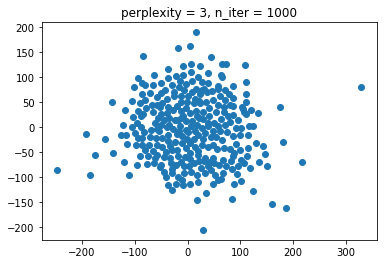

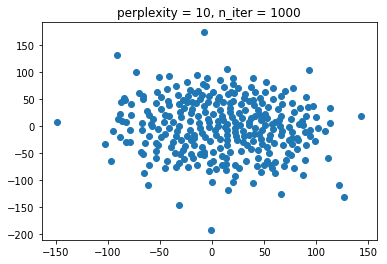

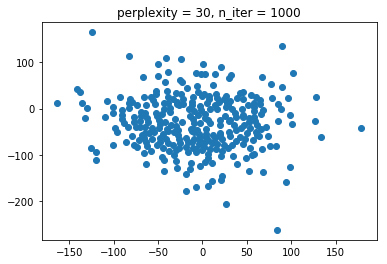

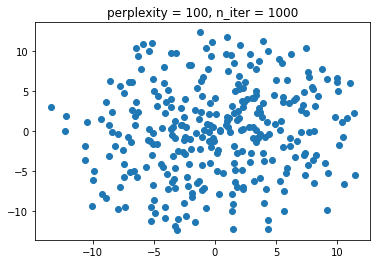

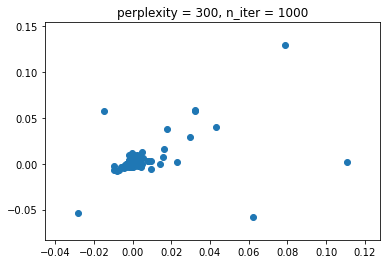

In [55]:
for perplex in [3,10,30,100,300]:
    PlottSNE(featureMatrix,perplex,1000)

No clear clustering for any perplexity values (except for 300, which is obvious as it's the number of data!). Let's experiment with number of iterations.

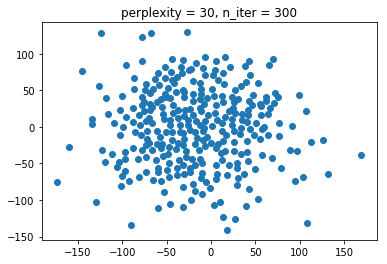

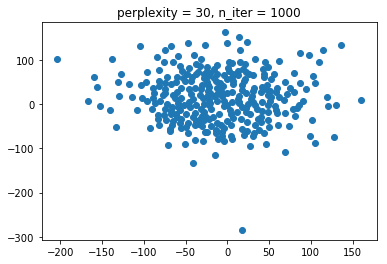

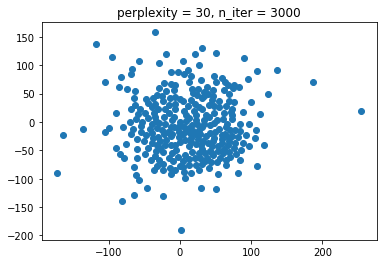

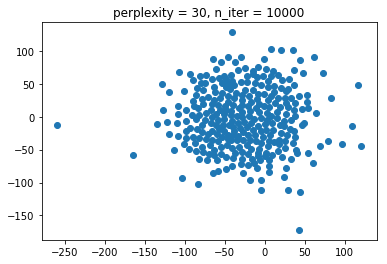

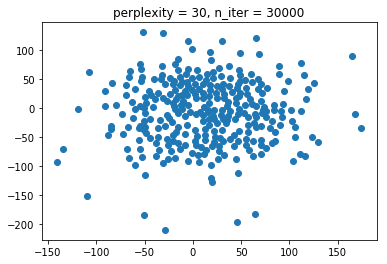

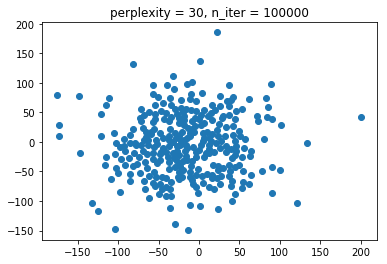

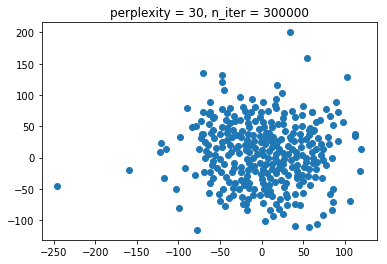

In [60]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,30,iteration)

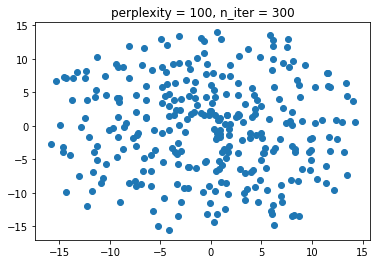

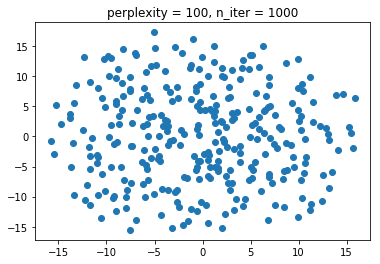

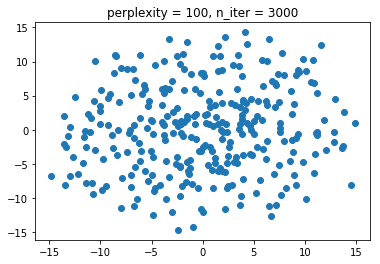

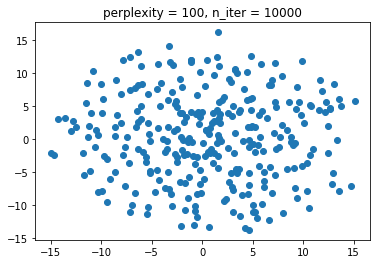

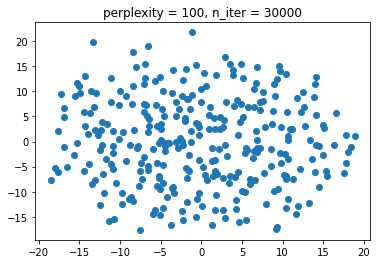

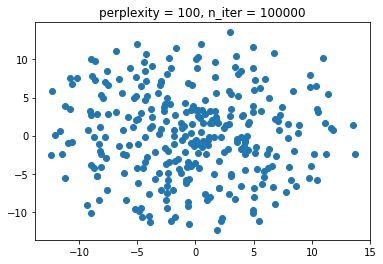

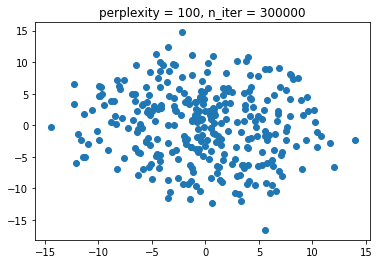

In [61]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,100,iteration)

No clusterint so far. Let's see perplexity = 300 for reference:

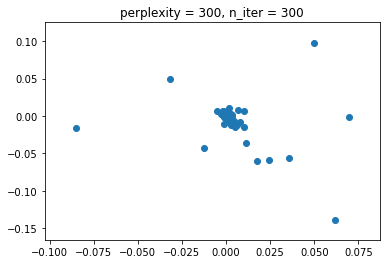

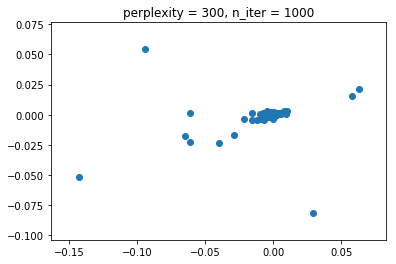

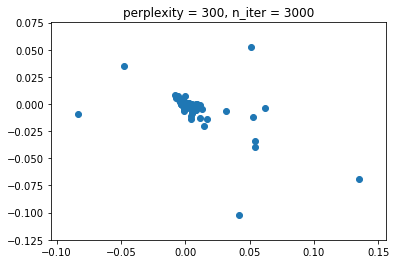

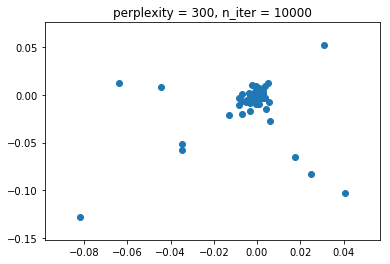

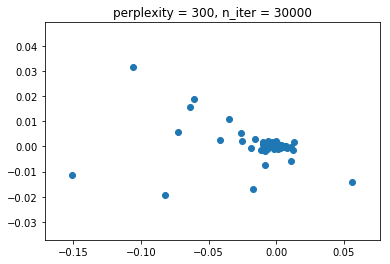

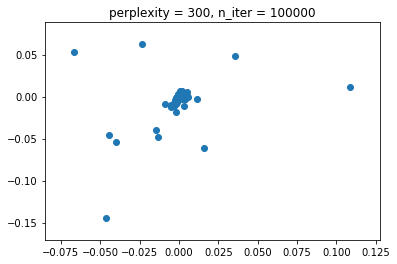

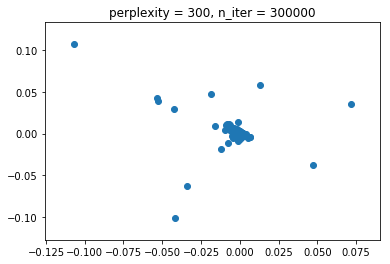

In [62]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,300,iteration)

Let's expand perplexity values a bit: 200 to see if there's anything (nontrivial) happening between 100 and 300, then below 30 (though unlikely to find anything meaningful there):

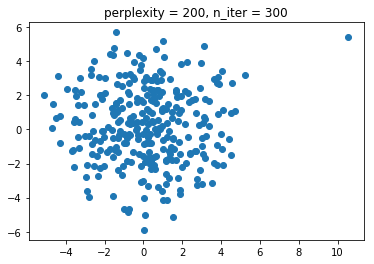

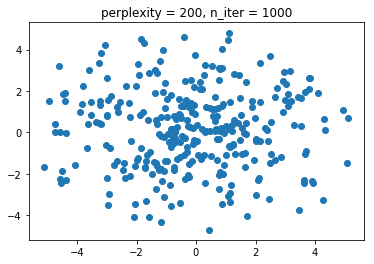

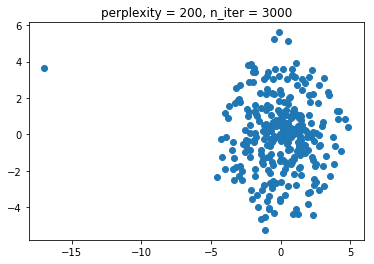

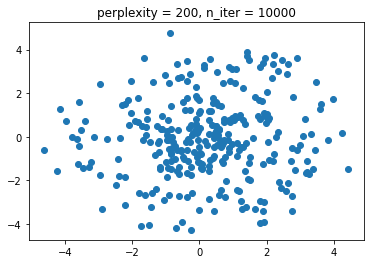

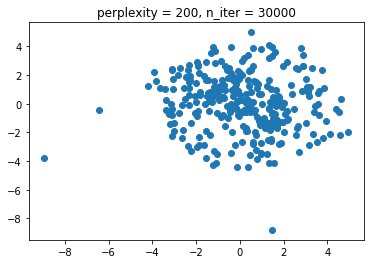

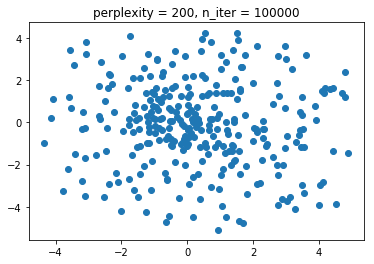

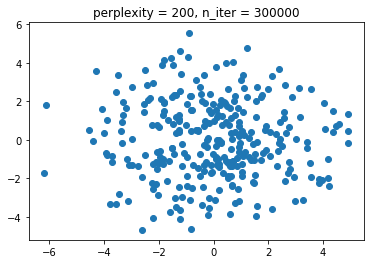

In [63]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,200,iteration)

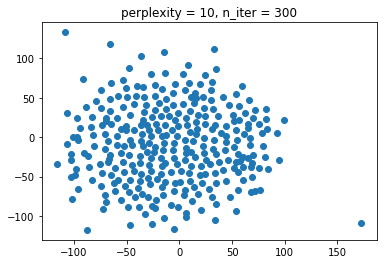

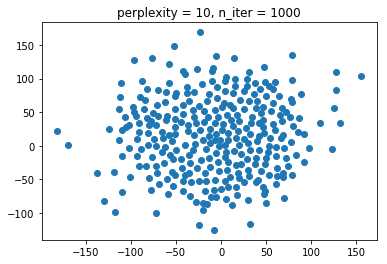

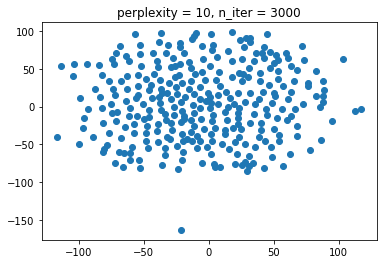

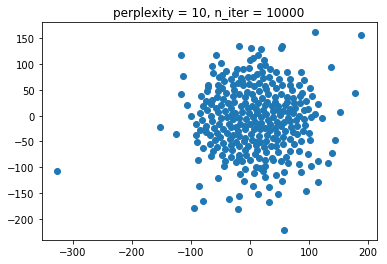

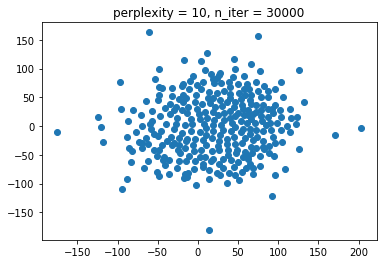

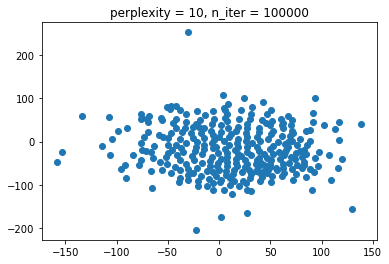

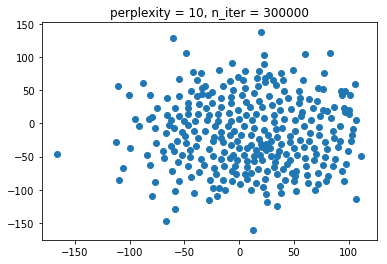

In [64]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,10,iteration)

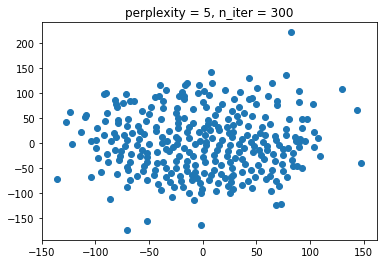

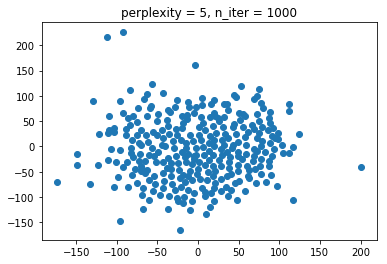

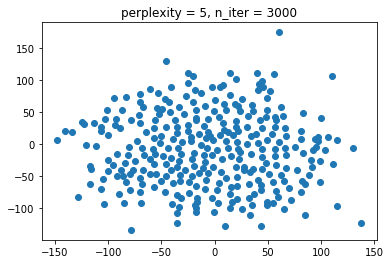

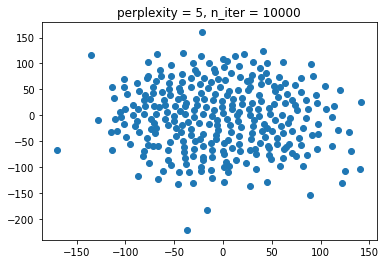

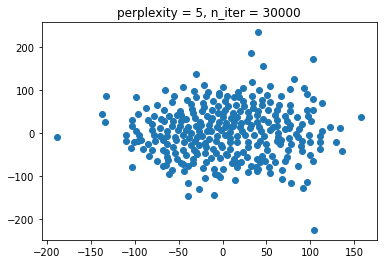

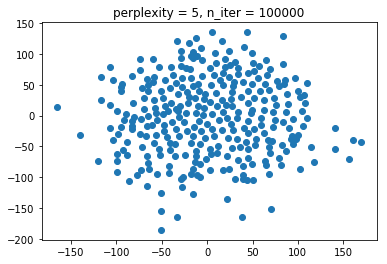

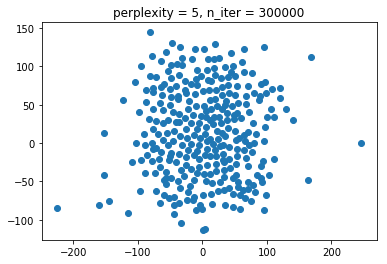

In [65]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,5,iteration)

All right. It seems this is one big cluster, at least when considering the 70 most frequent words as features. This is either because:

* these words are most frequent for a reason, i.e. they only predict that these are anthems. We possibly could separate this group from e.g. pop songs, or:

* we should pick different features: either a wider set of words as features (e.g. all of them), or stick with this subset, but analyze them differently (e.g. sentiment analysis on each word)

Let's try including all words as features.

## Using more features

In [66]:
corpus = ''
for el in keys:
    corpus = corpus + el + ' '

In [67]:
corpus

u'land us let peopl god may glori live nation love countri homeland one free freedom oh great heart peac shall long flag world sea blood time bless sun happi fatherland like come beauti hand sky march king unit son ever mountain stand life sing light die alway rise victori give forev liberti fight work dear belov voic etern name hail everi arm never go day brave war uniti song shine make togeth ye soul call brother island see lord men high faith children protect new battl strong hero way true translat mother hope honor home blue rais power motherland joy right ancestor thousand enemi star field banner river futur version father proud prais independ heaven eye death keep gloriou around struggl soil sacr honour hard fire white wave spirit red good cri without take strength prussian justic head earth africa water want upon say old law defend bright truth soviet nobl chain bear back sword lead know hill dawn build roar guard wind shield save immort born word union three success languag gav

In [68]:
X = vectorizer.fit_transform([corpus])

In [69]:
X.toarray()

array([[1, 1, 1, ..., 1, 1, 1]], dtype=int64)

These are the features in order:

In [70]:
vocabList = vectorizer.get_feature_names()
print vocabList

[u'aaron', u'aback', u'abandon', u'abel', u'abid', u'abkhazia', u'abkhazian', u'abl', u'abneg', u'abod', u'abound', u'abreast', u'abstract', u'abund', u'abus', u'abyss', u'academi', u'acced', u'accent', u'accept', u'acclaim', u'accompani', u'accomplic', u'accord', u'accumul', u'ach', u'achampn', u'achel', u'achiev', u'achiv', u'acrid', u'across', u'act', u'action', u'ad', u'adapt', u'addit', u'address', u'adhan', u'adig', u'admir', u'ado', u'adolf', u'ador', u'adorn', u'adrianopl', u'advanc', u'advers', u'advis', u'advoc', u'aegean', u'aether', u'afar', u'affair', u'affect', u'affirm', u'afflict', u'affront', u'afghan', u'afghanistan', u'afir', u'afraid', u'africa', u'african', u'afrikaan', u'afterward', u'age', u'aggressor', u'aggresst', u'agit', u'ago', u'agoni', u'agreement', u'agress', u'ah', u'ahead', u'ahti', u'aim', u'aimaq', u'air', u'akh', u'al', u'alabama', u'alal', u'alarm', u'alaska', u'alaskan', u'alba', u'albania', u'albanian', u'alert', u'alexand', u'alexandrov', u'alger

With these features chosen, now we need to find the feature vector for each anthem:

In [71]:
fullAnthems = CreateAnthemList(tFiles + oFiles)
procFullAnthems = []
for el in fullAnthems:
    procFullAnthems.append(PreProcess(el))
    
featureMatrix = vectorizer.transform(procFullAnthems).toarray()
print featureMatrix

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [72]:
from sklearn.manifold import TSNE

In [73]:
def PlottSNE(featureMatrix,perplex,iteration):
    featureMatrix_embedded = TSNE(n_components=2, perplexity=perplex, n_iter=iteration).fit_transform(featureMatrix)

    featureMatrix_plot = [[],[]]
    for el in featureMatrix_embedded:
        featureMatrix_plot[0].append(el[0])
        featureMatrix_plot[1].append(el[1])

    plt.scatter(featureMatrix_plot[0],featureMatrix_plot[1])
    plt.title('perplexity = ' + str(perplex) + ', n_iter = ' + str(iteration))
    plt.show()

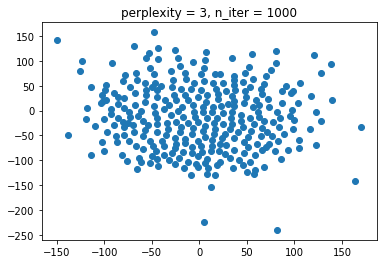

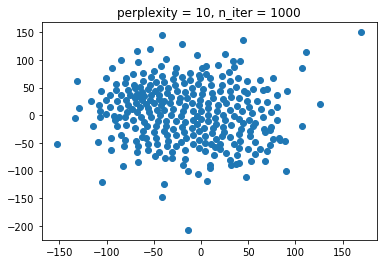

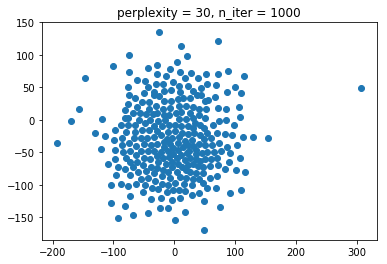

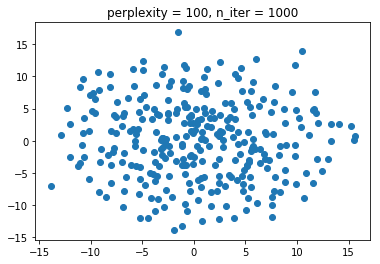

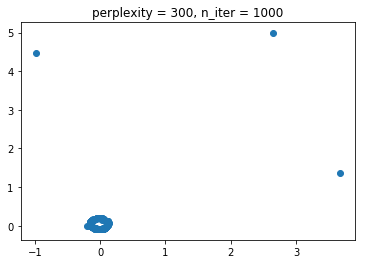

In [74]:
for perplex in [3,10,30,100,300]:
    PlottSNE(featureMatrix,perplex,1000)

No clear clustering for any perplexity values (except for 300, which is obvious as it's the number of data!). Let's experiment with number of iterations.

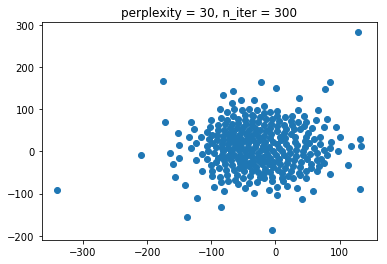

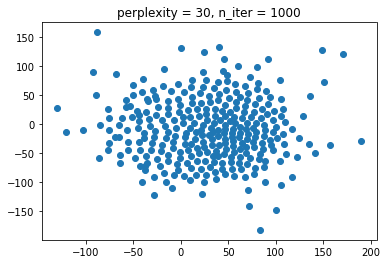

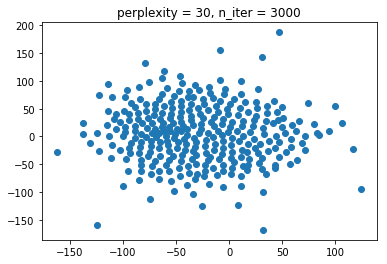

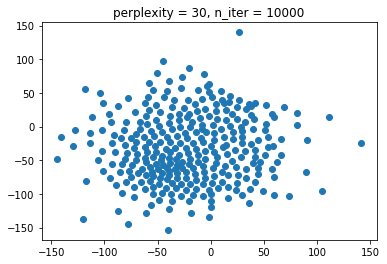

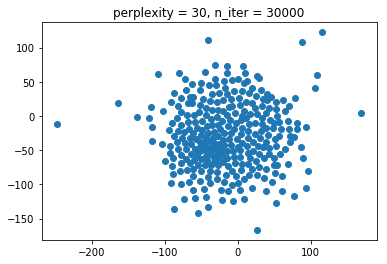

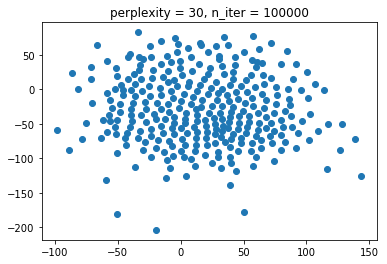

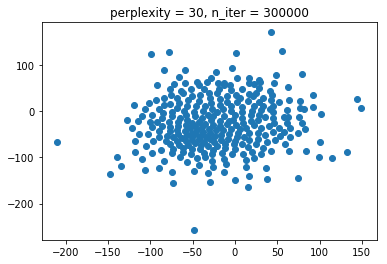

In [75]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,30,iteration)

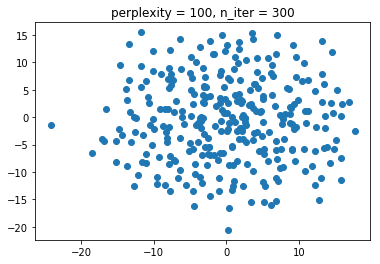

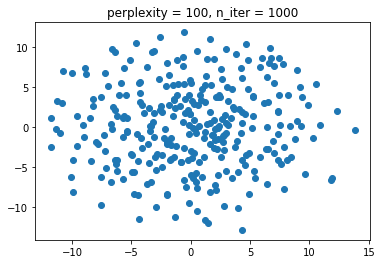

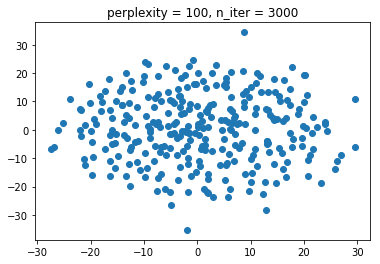

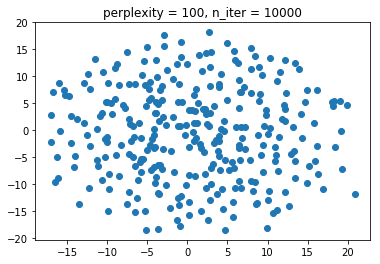

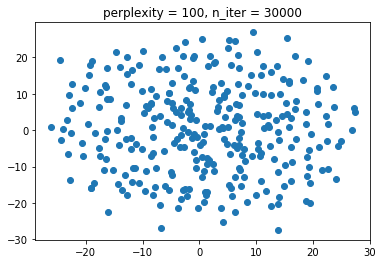

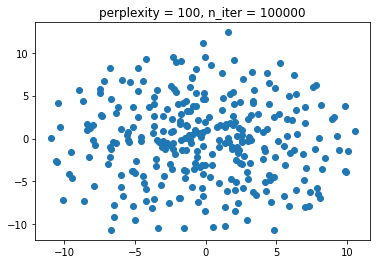

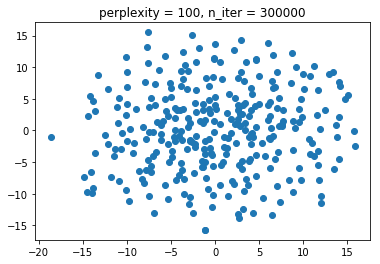

In [76]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,100,iteration)

No clustering so far. Let's see perplexity = 310 (> number of data points) for reference:

In [80]:
len(featureMatrix)

301

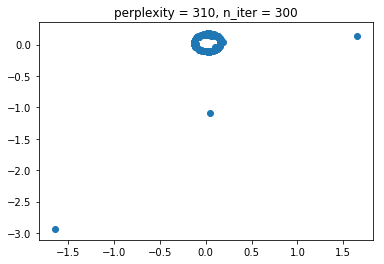

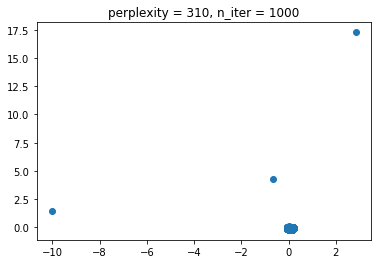

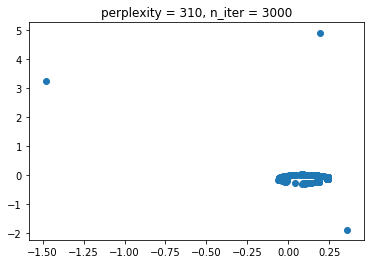

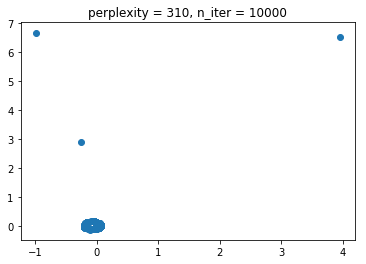

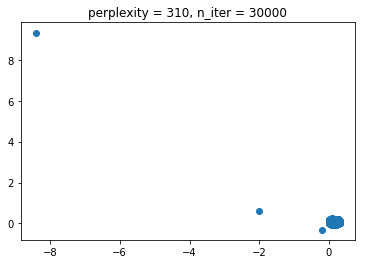

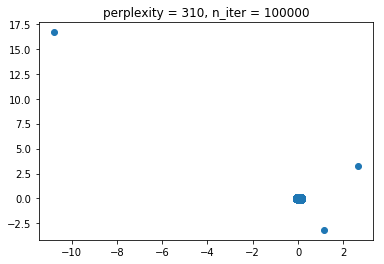

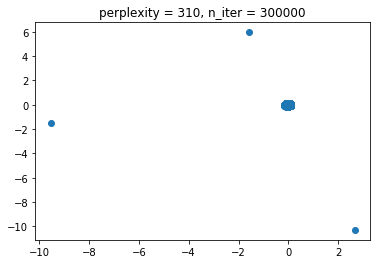

In [79]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,310,iteration)

It's still a big cluster, although it's interesting how 3 points are consistently excluded from that center. I'll look at them later one-by-one, to see whether they are indeed different.

Let's expand perplexity values a bit: 200 to see if there's anything (nontrivial) happening between 100 and 300, then below 30 (though unlikely to find anything meaningful there):

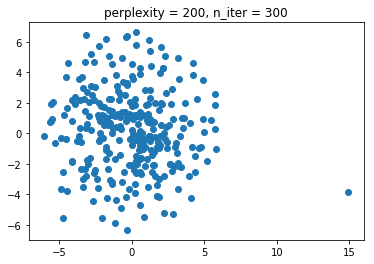

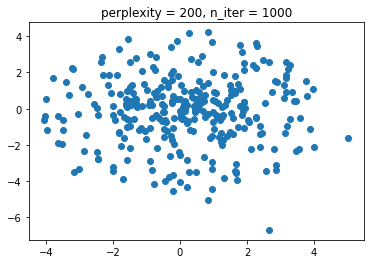

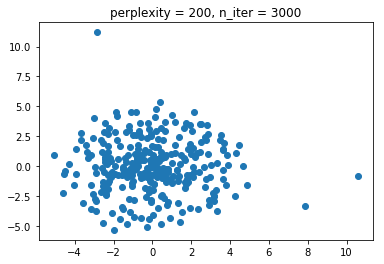

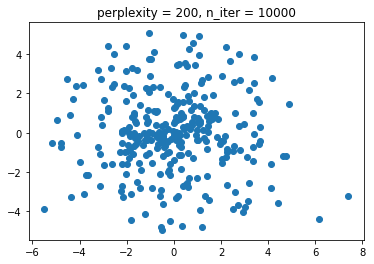

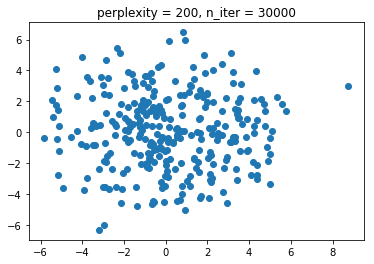

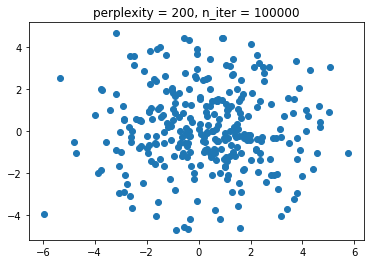

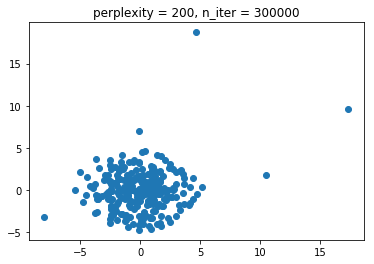

In [78]:
for iteration in [300,1000,3000,10000,30000,100000,300000]:
    PlottSNE(featureMatrix,200,iteration)

There are those couple of outliers (3-4) here as well, although less apparent than for perplexity = 300. Nothing else.

Let's look at those 3 outliers:

In [84]:
featureMatrix_embedded = TSNE(n_components=2, perplexity=310, n_iter=300).fit_transform(featureMatrix)
featureMatrix_X = []
featureMatrix_Y = []
for el in featureMatrix_embedded:
    featureMatrix_X.append(el[0])
    featureMatrix_Y.append(el[1])

In [89]:
mean = np.mean(featureMatrix_X)
stdev = np.std(featureMatrix_X)
print mean, stdev

0.00811936271125 0.540442657398


In [93]:
for i in range(len(featureMatrix_X)):
    el = featureMatrix_X[i]
    if (el > mean + 2*stdev) or (el < mean - 2*stdev):
        print i

131
276
288


In [99]:
print fullAnthems[131]
print '\n\n\n\n\n'
print fullAnthems[276]
print '\n\n\n\n\n'
print fullAnthems[288]

﻿Versions: #1#2
Don't be afraid, this red flag swaying in the horizon won't fade away;
Last fire burning on top of my country without going out.
It is my nation's star, it'll glow;
It is mine, it is my nation's only. Don't frown upon us, please O delicate crescent!
Smile upon my glorious nation! What is this fury, anger?
Or we will ask for our blood that we spilt for you,
My nation which worships the rightous God deserves liberation! I've always been living in liberty, I'll live in liberty.
Which idiot is going to keep me in chains? Nonsense;
I'm like a raging flood, I break through my dam;
I'll rip off the mountains, I wouldn't fit into boundless fields, I'll overflow. So what if ironclad walls surrounded the West horizon,
The faith in my bosom is my borders.
You're almighty, don't be afraid! How would strangle such a faith,
What you call "Civilization" who is but a monster with one tooth? Friend! Don't let scroundles into my country!
Shield with your body, let this shameless invasion

These are, in order:

1. Turkish National Anthem

2. National Anthem of Grenada

3. American Pledge of Allegiance

Let's see how far from average are these individually:

In [112]:
sigmas = []
for i in [131,276,288]:
    sigmas.append(abs((featureMatrix_X[i] - mean)/stdev))

print sigmas

[10.511222488356909, 2.2846084476474342, 13.11658603257418]


The first and last are over 10 sigmas away! while the middle one is only 2 sigmas out.

We need to keep in mind that t-SNE doesn't conserve Euclidian distance, though, so these numbers are in no way linearly dependent on the distance in feature-space.

Nevertheless, by reading them I do agree that stylistically speaking, the Anthem of Grenada is more in line with a regular anthem, while the Turkish anthem feels unique, and the Pledge of Allegiance could even be considered a mistake to include in a list of anthems.